In [34]:
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

In [35]:
class Data:
    def __init__(self, den, vel, deltas, num_active, num_created, 
        den_time, vel_time, delta_time, cr_time) -> None:
        self.den = den 
        self.vel = vel 
        self.deltas = deltas
        self.num_active = num_active 
        self.num_create = num_created
        self.den_time = den_time 
        self.vel_time = vel_time 
        self.delta_time = delta_time 
        self.cr_time = cr_time

def load(root_dir):
    root = Path(root_dir)

    cr_path = root / "creation_rate" / "data"
    delta_path = root / "delta" / "data"
    dv_path = root / "den_vel" / "data"


    cr = {}
    with open(cr_path / "metadata.yaml") as f:
        import yaml
        cr_np = yaml.unsafe_load(f)["num_points"]
    for name in ["num_active", "num_created", "time"]:
        key = name
        if name == "time":
            key = "cr_time" 

        cr[key] = np.load(cr_path / f"{name}_0.npy")[:cr_np]

    dv = {}
    for name in ["den_time", "den", "vel", "vel_time"]:
        dv[name] = np.load(dv_path / f"{name}.npy")
    
    delta = {}
    for name in ["deltas", "times"]:
        key = name
        if name == "times":
            key = "delta_time" 
        
        delta[key] = np.load(delta_path / f"{name}.npy")

    return Data(**cr, **dv, **delta)

Text(0.5, 1.0, 'active')

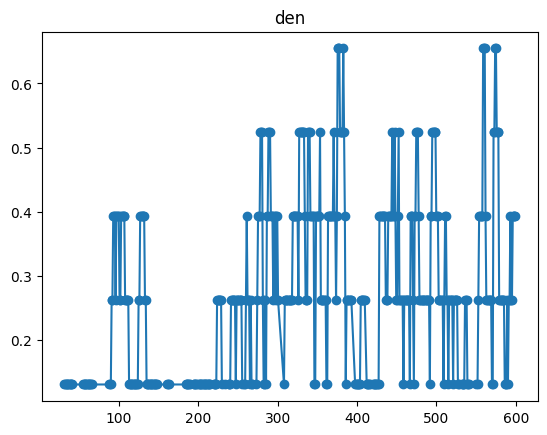

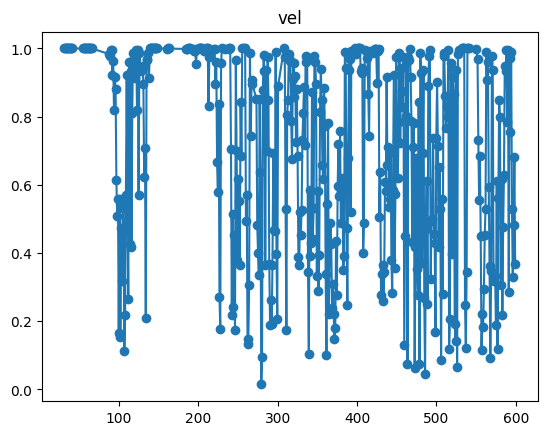

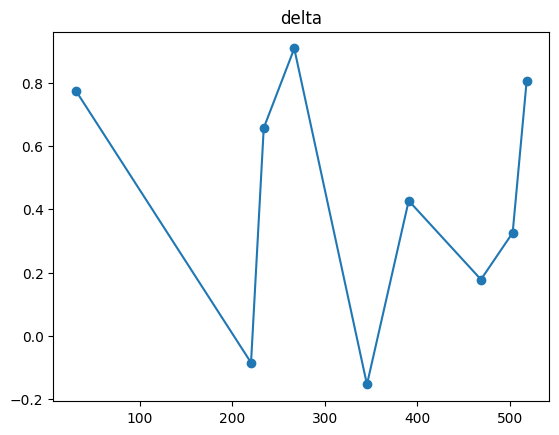

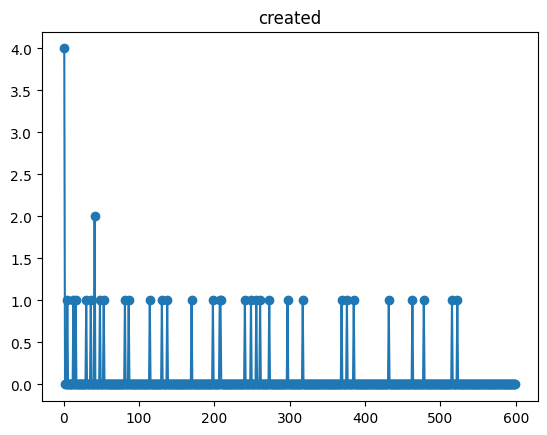

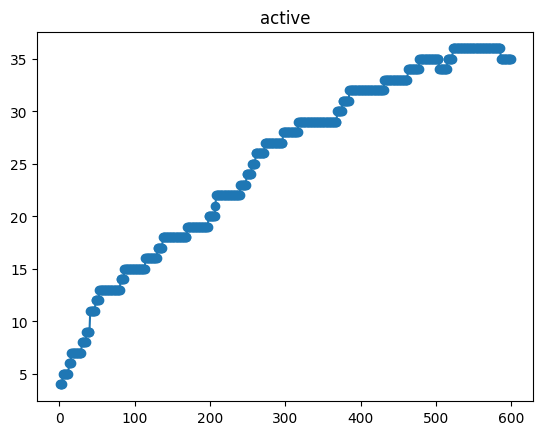

In [36]:
data = load("data/teste")

kwargs = {"marker": "o"}

plt.plot(data.den_time, data.den, **kwargs) 
plt.title("den")
plt.figure()
plt.plot(data.vel_time, data.vel, **kwargs) 
plt.title("vel")
plt.figure()
plt.plot(data.delta_time[:-1], data.deltas, **kwargs) 
plt.title("delta")
plt.figure()
plt.plot(data.cr_time, data.num_create, **kwargs) 
plt.title("created")
plt.figure()
plt.plot(data.cr_time, data.num_active, **kwargs) 
plt.title("active")

In [27]:
# path = Path("data/little_adh_3/delta")
data_dir = "align_1"

path = Path(f"data/{data_dir}/delta")
ids = np.load(Path(f"data/{data_dir}/autosave/ids.npy"))

import pickle
with open(path / "autosave" / "col_state.pickle", "rb") as f:
    state = pickle.load(f)

In [20]:
n = state["mask"].sum()
state["rings_neighs"].neigh_count[:n]
deltas = state["deltas_arr"][:state["in_center"].sum()]

deltas
print(deltas.size)
print(deltas)
print(state["delta_done"][:state["in_center"].size][state["in_center"]])
deltas = deltas[deltas != 0]
deltas.mean()

29
[0.98853423 0.95935802 0.99264113 0.98950967 0.96016421 0.
 0.         0.9723326  0.9777827  0.99535497 0.99594361 0.
 0.9927775  0.45383726 0.9836643  0.98778728 0.99659926 0.529295
 0.97998241 0.9258023  0.9886571  0.97323033 0.98313733 0.930634
 0.97643725 0.98649357 0.98195185 0.         0.        ]
[ True  True  True  True  True False False  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False]


0.9375794954825821